In [1]:
 #Modarres - Ex 4.10

from sympy import *
init_session()
from sympy.stats import *
import matplotlib.pyplot as plt
import numpy as np


F, a, b, R, mttf, l =symbols('F a b R mttf l')

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:




#b)Design 1 Cut sets:
#c1 = a,b
#c2 = c,d

#design 2 cut sets:

#c3 = a,c
#c4 = a,d
#c5= b,c
#c6 = b,d

Fmax=10**-2
Rmin=1-Fmax

Rmin

In [3]:
Ra=exp(-10**-6*t)
Rb=exp(-10**-6*t)
Rc=exp(-10**-3*t)
Rd=exp(-10**-3*t)
Fa=1-Ra
Fb=1-Rb
Fc=1-Rc
Fd=1-Rd
Fc1 = Fa*Fb
Fc2 = Fc*Fd
Fc3 = Fa*Fc
Fc4 = Fa*Fd
Fc5 = Fb*Fc
Fc6 = Fb*Fd

Rd1= 1-Fc1-Fc2
Rd2= 1-Fc3-Fc4-Fc5-Fc6


In [4]:
Rd1.subs({t:100})

In [5]:
Rd2.subs({t:100})


In [6]:
#Rd2(100)>Rd1(100), portanto Rd2 é o melhor design.


Rd2.subs({t:2500})

In [7]:
b = 105
a=1
while a > Rmin:
    b = b+0.01
    a = Rd1.subs({t:b})
b

In [8]:
b = 2686
a=1
while a > Rmin:
    b = b+0.1
    a = Rd2.subs({t:b})
b

In [9]:
Rd22=Ra**2+Rc**2-Ra**2*Rc**2

In [10]:
b = 5000
a=1
while a > Rmin:
    b = b+0.1
    a = Rd22.subs({t:b})
b

In [11]:
Rd22.subs({t:100})

In [12]:
Rd3=1-((Fa+Fb)*(Fc*Fd))

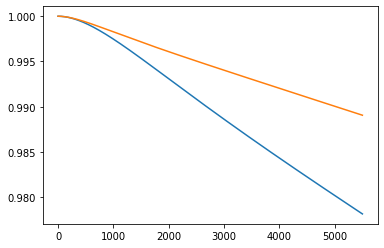

In [25]:
vector = np.arange(0,5500)
def predict(var):
    return Rd2.subs({t:var})

def predict2(var):
    return Rd22.subs({t:var})

predict_v = np.vectorize(predict)
predict2_v = np.vectorize(predict2)
plt.plot(vector,predict_v(vector))
plt.plot(vector,predict2_v(vector))